In [170]:
import warnings 
warnings.filterwarnings('ignore')

In [171]:
#Bank Personal Loan Modelling

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import math
from scipy.stats import zscore 
from scipy import stats

In [173]:
#Question 1:: Read the column description and ensure you understand each attribute well
bank_personal_loan_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
print(bank_personal_loan_df.info())
print(bank_personal_loan_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003  

In [174]:
#Question 2:: Study the data distribution in each attribute, share your findings. (5 points)

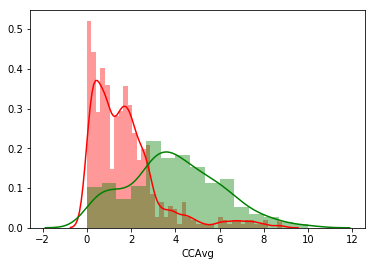

The persons who have the personal loan also have high credit card average.


In [175]:
sns.distplot( bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 1]['CCAvg'], color = 'g')
plt.show()
print("The persons who have the personal loan also have high credit card average.")

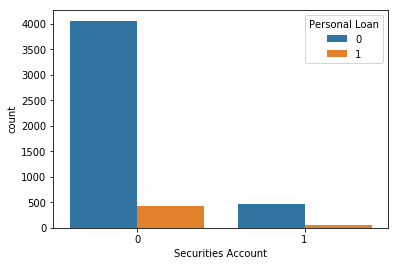

In [176]:
#Count plot of securities account in contrast to personal loan probability count
sns.countplot(x="Securities Account", data=bank_personal_loan_df,hue="Personal Loan")

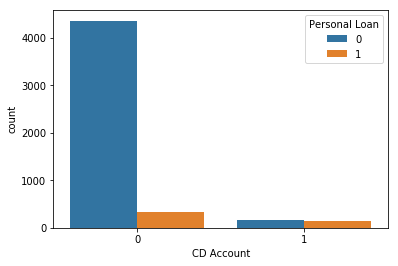

In [177]:
#CD Account count in conntrast to personal loan probability count 
sns.countplot(x="CD Account", data=bank_personal_loan_df,hue="Personal Loan")

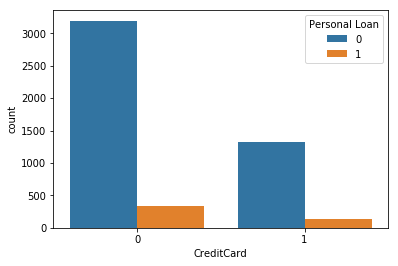

In [178]:
#Credit card count in contrast to personal loan probability count
sns.countplot(x="CreditCard", data=bank_personal_loan_df,hue="Personal Loan")

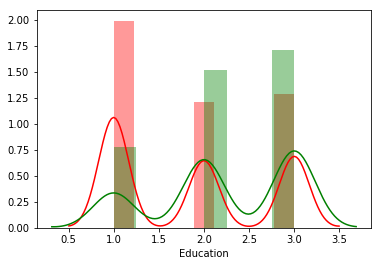

The persons with the education level one has less personal loan, the personal loan increases with increase in education level.


In [179]:
sns.distplot( bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 0]['Education'], color = 'r')
sns.distplot( bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 1]['Education'], color = 'g')
plt.show()
print("The persons with the education level one has less personal loan, the personal loan increases with increase in education level.")

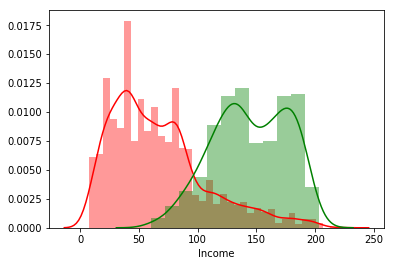

The person with higher income has personal loans.


In [180]:
sns.distplot( bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 0]['Income'], color = 'r')
sns.distplot( bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 1]['Income'], color = 'g')
plt.show()
print("The person with higher income has personal loans.")

In [181]:
pval = stats.ttest_ind(bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 0]['Family'], bank_personal_loan_df[bank_personal_loan_df["Personal Loan"] == 1]['Family'])
print(pval)
print("Since the p value is less than 0.05, we can conclude that we reject null hypotheis. Which means that the number of family member does not impact the personal loan. The two means mu1 and mu2 are not equal.")
#print(bank_personal_loan_df[bank_personal_loan_df["Personal Loan"]== 0]['Family'])

Ttest_indResult(statistic=-4.34662958524817, pvalue=1.4099040685673807e-05)
Since the p value is less than 0.05, we can conclude that we reject null hypotheis. Which means that the number of family member does not impact the personal loan. The two means mu1 and mu2 are not equal.


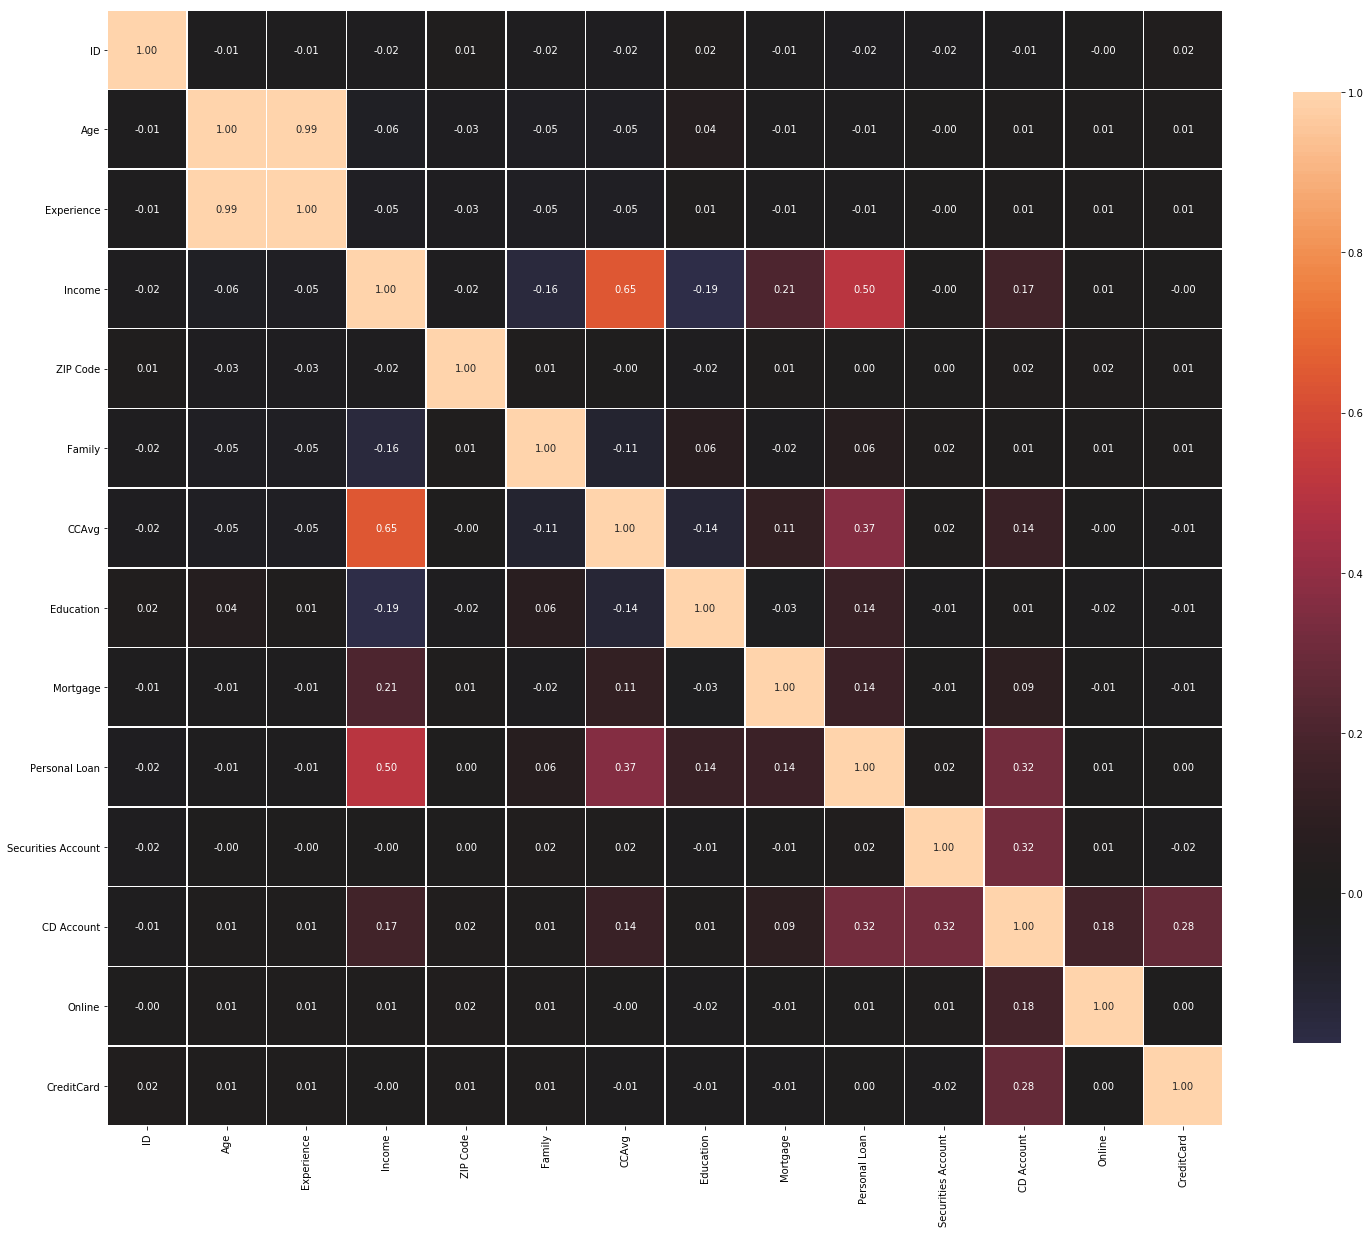

In [182]:
plt.figure(figsize=(25, 25))
sns.heatmap(bank_personal_loan_df.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [183]:
bank_personal_loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
sns.pairplot(bank_personal_loan_df)

In [ ]:
#Question 3:: Get the target column distribution. Your comments (5 points)
bank_personal_loan_df['Personal Loan'].plot(kind='hist', figsize=[12,6])
print("The data shows that out of 5000 customers, 480 customers are awarded the loan, which is roughly 9.6% of the total population.")
print(bank_personal_loan_df.groupby(['Personal Loan']).size())
print("The below histograph represents the frequency of Personal Loan granted to the customers. The graph shows that the number of customers to whom personal loan is granted is very less.")

In [ ]:
# Question 4:: Split the data into training and test set in the ratio of 70:30 respectively ( 5 points)

In [ ]:
X = bank_personal_loan_df.drop(["Personal Loan", "ID"], axis=1)
#Since the standard deviation of binary values are not zero, hence subjecting all the independent attribues to zscore normalization
Xnormalized = X.apply(zscore)
y = bank_personal_loan_df["Personal Loan"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(Xnormalized, y, test_size=test_size, random_state=seed)

In [ ]:
# Question 5:: Use different classification models (Logistic, K-NN and Naïve Bayes) 
# to predict the likelihood of a liability customer buying personal loans (25 points) And
#Question 6:: Print the confusion matrix for all the above models (10 points)
#The comparative tabular study of the accuracy, recall, f1score and precision is done at the end.

In [ ]:
#Using Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("The model score is",model_score)
accuracyLR=accuracy_score(y_test,y_predict)
precisionLR = precision_score(y_test,y_predict)
recallLR = recall_score(y_test,y_predict)
f1scoreLR = f1_score(y_test,y_predict)
resultsLR = [accuracyLR, recallLR, precisionLR, f1scoreLR]
print("The accuracy using Logistic Regression is",accuracyLR)
cm = confusion_matrix(y_test,y_predict)
print(cm)

In [ ]:
#Using K-NN

In [ ]:
k=math.sqrt(bank_personal_loan_df.shape[0])
NNH = KNeighborsClassifier(n_neighbors= round(k))
NNH.fit(X_train,y_train)
ypred = NNH.predict(X_test)
accuracyKNN=accuracy_score(y_test,ypred)
precisionKNN = precision_score(y_test,ypred)
recallKNN = recall_score(y_test,ypred)
f1scoreKNN = f1_score(y_test,ypred)
resultsKNN = [accuracyKNN, recallKNN, precisionKNN, f1scoreKNN]
print("The accuracy when k={} is {}".format(round(k),accuracyKNN))
cm = confusion_matrix(y_test,ypred)
print(cm)

In [ ]:
#Using Naive Bayes

In [ ]:
gaussnb = GaussianNB()
gaussnb.fit(X_train,y_train)
ypred = gaussnb.predict(X_test)
accuracyNB=accuracy_score(y_test,ypred)
precisionNB = precision_score(y_test,ypred)
recallNB = recall_score(y_test,ypred)
f1scoreNB = f1_score(y_test,ypred)
resultsNB = [accuracyNB, recallNB, precisionNB, f1scoreNB]
print("The accuracy using GaussianNB is {}".format(accuracyNB))
cm = confusion_matrix(y_test,ypred)
print(cm)

In [ ]:
#Question 7::Give your reasoning on which is the best model in this case and why it performs better? (10 points)
#Answer

#(i) Logistic regression (accuracy = 95.46) In case of Logistic regression, the weights or coefficient values are taken into 
#consideration for the prediction of Logistic 
#Regression, hence it is more accure in the prediction of probability for the outcome or dependent variable.

#(ii) Knn (accuracy = 93.26) In case K nearest neighbor, the prediction of the probability for the outcome(dependent) 
#variable is largely based on the probability of the adjacent neighbors. Owing to the fact that the k value is chosen using the
#heuristic approach, the probability of the dependent variable is based on the outcome probability of the k neighbors.

#(iii) Naive Bayes (accuracy = 87.8) In case of naive bayes, the prediction of probability is calculated based on the bayes
#theorm, which takes into account of the probability of the independent attributes rather than the actual weight or probability
#of the nearest neighbor. Hence owing to more focus on probabilistic approach, this model yields the lowest accuracy.

#since it is clear from the below table that recall value is higher for Logistic regression and accuracy
#is also the highest for it. Also the f1_score and precision is very good for Logistic regression. Hence we will select Logistic
#Regression as the best model.

In [ ]:
resultsDf = pd.DataFrame( index=["accuracy", "recall", "precision", "f1_score"])
resultsDf['Logistic Regression Results'] = resultsLR
resultsDf['KNN Results'] = resultsKNN
resultsDf['Naive Bayes Results'] = resultsNB
print(resultsDf)